In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp_X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Расчёт с интерсептом:

In [3]:
b = (np.mean(zp_X*ks_y)-np.mean(zp_X)*np.mean(ks_y))/(np.mean(zp_X**2)-np.mean(zp_X)**2)
b

2.620538882402765

In [4]:
a = np.mean(ks_y) - b*np.mean(zp_X)
a

444.1773573243596

In [5]:
y_hat = a + b*zp_X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

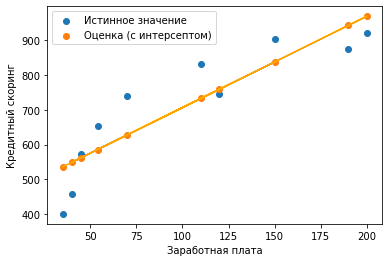

In [6]:
plt.scatter(zp_X, ks_y, label = 'Истинное значение')
plt.scatter(zp_X, y_hat, label = 'Оценка (с интерсептом)')
plt.plot(zp_X, a + b*zp_X, color = 'orange')
plt.xlabel("Заработная плата")
plt.ylabel("Кредитный скоринг")
plt.legend()
plt.show()

In [7]:
mse = sum((ks_y - y_hat)**2)/len(ks_y)
mse

6470.41420117666

Расчёт без интерсепта:

In [8]:
X = zp_X.reshape((len(zp_X),1))
y = ks_y.reshape((len(ks_y),1))

In [9]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)[0,0]
B

5.889820420132688

In [10]:
y_hat = np.array(B*zp_X)
y_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

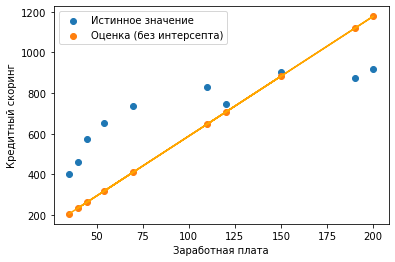

In [11]:
plt.scatter(zp_X, ks_y, label = 'Истинное значение')
plt.scatter(zp_X, y_hat, label = 'Оценка (без интерсепта)')
plt.plot(zp_X, B*zp_X, color = 'orange')
plt.xlabel("Заработная плата")
plt.ylabel("Кредитный скоринг")
plt.legend()
plt.show()

In [12]:
mse = sum((ks_y - y_hat)**2)/len(ks_y)
mse

56516.8584157194

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [13]:
B1 = 10
alpha = 1e-6
n = len(zp_X)

In [14]:
def mse_(B1, y=ks_y, X=zp_X, n=n):
    return np.sum((B1*X-y)**2)/n

In [15]:
for i in range(400):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%25==0:
        print(f'Iter: {i}, B1={B1}, mse={mse_(B1)}')

Iter: 0, B1=9.8867514, mse=276604.34287384455
Iter: 25, B1=7.877621569365293, mse=110953.07378863974
Iter: 50, B1=6.878417278270489, mse=69981.0567613131
Iter: 75, B1=6.381481141979654, mse=59847.07959012656
Iter: 100, B1=6.134338965197076, mse=57340.5519462072
Iter: 125, B1=6.011427284833617, mse=56720.5899388331
Iter: 150, B1=5.950299389277936, mse=56567.24916418826
Iter: 175, B1=5.919898538813467, mse=56529.32201238056
Iter: 200, B1=5.904779227072703, mse=56519.94114908718
Iter: 225, B1=5.897259911526532, mse=56517.620895866596
Iter: 250, B1=5.893520316282229, mse=56517.04700678632
Iter: 275, B1=5.891660496394986, mse=56516.90506164278
Iter: 300, B1=5.890735548696904, mse=56516.86995307483
Iter: 325, B1=5.890275542730705, mse=56516.86126935721
Iter: 350, B1=5.890046767104388, mse=56516.859121535286
Iter: 375, B1=5.88993298969487, mse=56516.8585902952


### *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
B1 = 10
B0 = 500
alpha = 1e-5
n = len(zp_X)

In [17]:
def mse2_(B0, B1, y=ks_y, X=zp_X, n=n):
    return np.sum(((B0 + B1*X)-y)**2)/n

In [18]:
for i in range(1000000):
    B0 -=alpha*(2/n)*np.sum((B0 + B1*X-y))
    B1 -=alpha*(2/n)*np.sum((B0 + B1*X-y)*X)
    if i%50000==0:
        print(f'Iter: {i}, B0={B0}, B1={B1}, mse={mse2_(B0, B1)}')

Iter: 0, B0=499.983918, B1=7.853546614296, mse=446073.2310428109
Iter: 50000, B0=487.44872766994786, B1=2.3020440809637925, mse=6945.379294042708
Iter: 100000, B0=477.75416649417133, B1=2.3733999754514676, mse=6756.396557187737
Iter: 150000, B0=470.23158451942373, B1=2.4287692238302614, mse=6642.607714295904
Iter: 200000, B0=464.3943693489036, B1=2.471733490315086, mse=6574.094044835232
Iter: 250000, B0=459.8649297148455, B1=2.5050719994807937, mse=6532.841117187313
Iter: 300000, B0=456.3502702754963, B1=2.5309413156434437, mse=6508.0022193013665
Iter: 350000, B0=453.62303865908063, B1=2.5510148442886242, mse=6493.046411717081
Iter: 400000, B0=451.5068187470441, B1=2.5665910794598776, mse=6484.041335021439
Iter: 450000, B0=449.86471886482866, B1=2.5786775992939437, mse=6478.619266982842
Iter: 500000, B0=448.5905166858285, B1=2.5880562431120757, mse=6475.354572765493
Iter: 550000, B0=447.6017880399248, B1=2.5953336861705956, mse=6473.388860004788
Iter: 600000, B0=446.8345751506825, B1=2